# Training Machine Learning Algorithms for Classification

## Algorithm


### 1. Perceptron


In [1]:
import numpy as np

class Perceptron(object):
  """Perceptron classifier

  Parameters
  ------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset
  random_state : int
    Random number generator seed for random weight
    initilaization.

  Attributes
  ------------
  w_ : 1d-array
    Weights after fitting.
  errors_ : list
    Number of misclassifications (updates) in each epoch.

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data

    Parameters
    ------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_feature is the number of features.
    y : array-like, shape = [n_examples]
      Target values

    Returns
    --------
    self : object

    """

    """Initializes a random number generator (rgen)
      self.random_state is a seed provided by the user or set earlier in the
      code. A seed ensures that the random numbers generated are reproducible.
    """
    rgen = np.random.RandomState(self.random_state)

    """Generates a set of random numbers from a normal distribution
      loc : the mean of the distribution
      scale : the standard deviation
      size : the size of the array
    """
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

### 2. Adaline

In [2]:
class AdalineGD(object):
  """ADAptive LInear NEuron classifier

  Parameters
  ------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset
  random_state : int
    Random number generator seed for random weight
    initilaization.

  Attributes
  ------------
  w_ : 1d-array
    Weights after fitting.
  cost_ : list
    Sum-of-squares cost function value in each epoch.

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data

    Parameters
    ------------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_feature is the number of features.
    y : array-like, shape = [n_examples]
      Target values

    Returns
    --------
    self : object

    """

    """Initializes a random number generator (rgen)
      self.random_state is a seed provided by the user or set earlier in the
      code. A seed ensures that the random numbers generated are reproducible.
    """
    rgen = np.random.RandomState(self.random_state)

    """Generates a set of random numbers from a normal distribution
      loc : the mean of the distribution
      scale : the standard deviation
      size : the size of the array
    """
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
    self.cost_ = []

    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """Compute linear activation"""
    return X

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training & Result


### A function for calculate accuracy

In [3]:
def accuracy_score(y_true, y_pred):
  # Count the number of correct predictions
  correct_predictions = np.sum(y_true == y_pred)

  # Calculate accuracy by dividing correct predictions by the total number of samples
  accuracy = correct_predictions / len(y_true)

  return accuracy


### Reading-in the iris dataset

In [4]:
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()
# df

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Linear separable using two features to classify two classes
two classes : `setosa` and `versicolor`

two features : `sepal length` and `petal length`

#### Preprocessing and plotting the Iris data

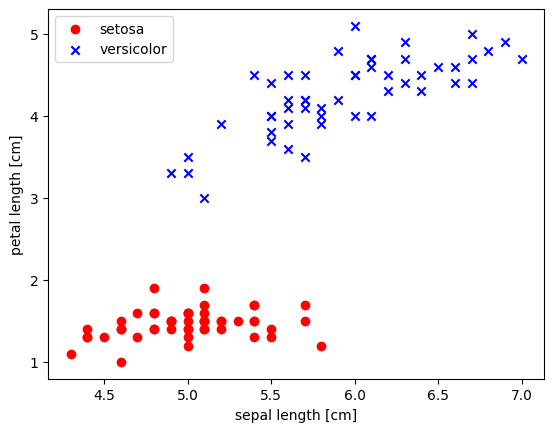

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[:100, 4].values
y = np.where( y == 'Iris-setosa', -1, 1)

# extract sepal and petal length
X = df.iloc[:100, [0,2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

#### Training the Perceptron model

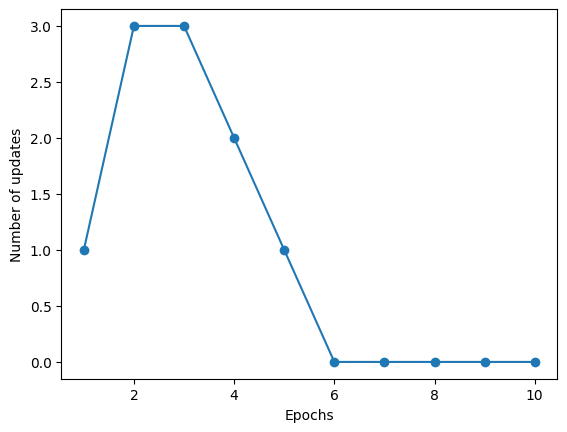

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

#### Training the Adaline model


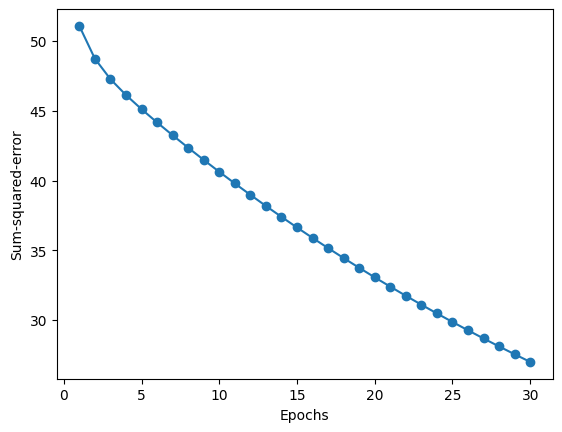

In [7]:
ada = AdalineGD(n_iter=30, eta=0.0001)
ada.fit(X, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

#### A function for plotting decision regions

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

  # set up marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  # This creates a colormap using the selected colors for plotting,
  # ensuring that each class gets a distinct color.
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  # .ravel(): This method flattens a 2D array into a 1D array
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

#### Perceptron model result

<ipython-input-8-f7514e5a6ee6>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


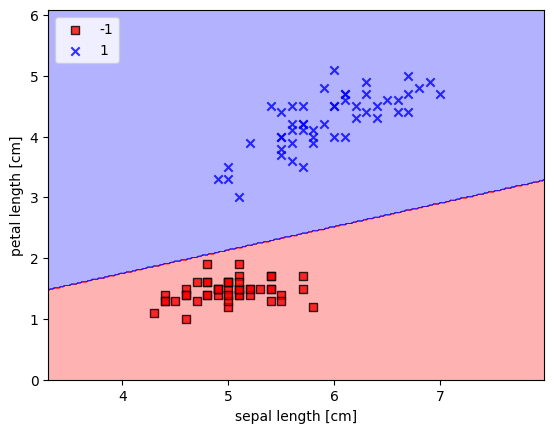

Perceptron accuracy: 1.0


In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

y_pred_ppn = ppn.predict(X)
accuracy = accuracy_score(y, y_pred_ppn)
print(f'Perceptron accuracy: {accuracy}')


#### Adaline Result

<ipython-input-8-f7514e5a6ee6>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


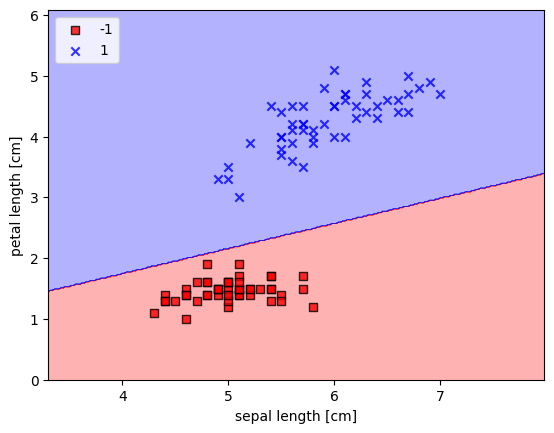

Adaline accuracy: 1.0


In [10]:
plot_decision_regions(X, y, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

y_pred_ada = ada.predict(X)
accuracy = accuracy_score(y, y_pred_ada)
print(f'Adaline accuracy: {accuracy}')

### Linear separable using three features to classify two classes
two classes : `setosa` and `versicolor`

three features : `sepal length`, `sepal width` and `petal length`

#### Preprocessing Iris data

In [11]:
# select setosa and versicolor
y = df.iloc[:100, 4].values
y = np.where( y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[:100, 0:3].values

#### Training the Perceptron model

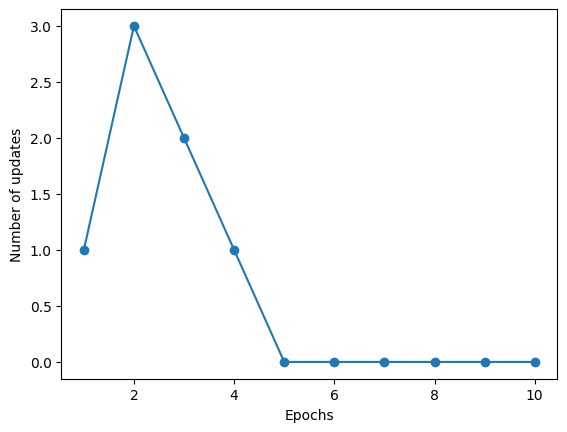

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

#### Training the Adaline model


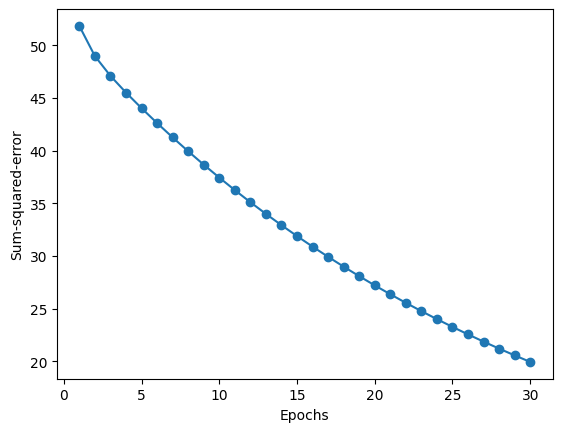

In [13]:
ada = AdalineGD(n_iter=30, eta=0.0001)
ada.fit(X, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

#### Perceptron model result

In [14]:
y_pred_ppn = ppn.predict(X)
accuracy = accuracy_score(y, y_pred_ppn)
print(f'Perceptron accuracy: {accuracy}')

Perceptron accuracy: 1.0


#### Adaline Result

In [15]:
y_pred_ada = ada.predict(X)
accuracy = accuracy_score(y, y_pred_ada)
print(f'Adaline accuracy: {accuracy}')

Adaline accuracy: 1.0


### Linear separable using four features to classify two classes
two classes : `setosa` and `versicolor`

three features : `sepal length`, `sepal width`, `petal length` and `petal width`

#### Preprocessing Iris data

In [16]:
# select setosa and versicolor
y = df.iloc[:100, 4].values
y = np.where( y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[:100, 0:4].values

#### Training the Perceptron model

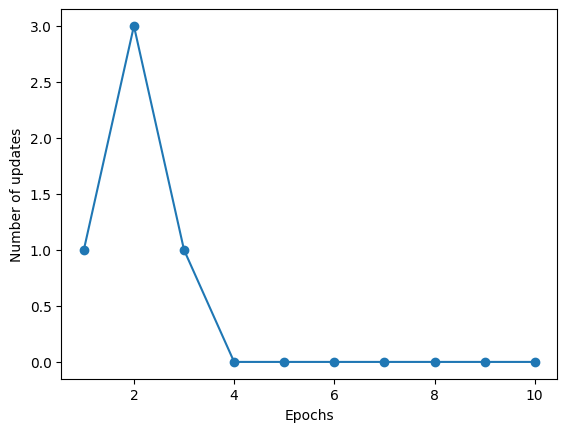

In [17]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

#### Training the Adaline model


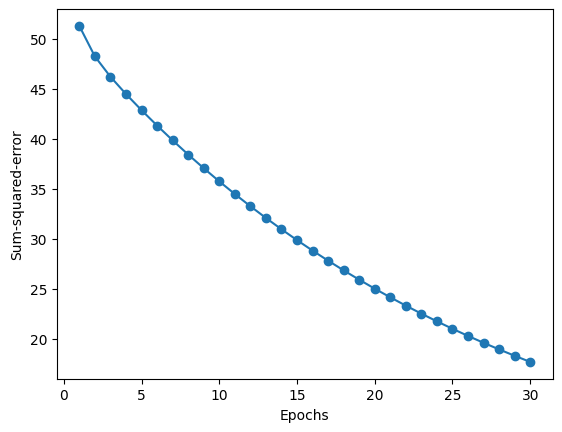

In [18]:
ada = AdalineGD(n_iter=30, eta=0.0001)
ada.fit(X, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

#### Perceptron model result

In [19]:
y_pred_ppn = ppn.predict(X)
accuracy = accuracy_score(y, y_pred_ppn)
print(f'Perceptron accuracy: {accuracy}')

Perceptron accuracy: 1.0


#### Adaline Result

In [20]:
y_pred_ada = ada.predict(X)
accuracy = accuracy_score(y, y_pred_ada)
print(f'Adaline accuracy: {accuracy}')

Adaline accuracy: 1.0


### NOT Linear separable using two features to classify two classes
two classes : `versicolor` and `virginica`

two features : `sepal length` and `sepal width`

#### Preprocessing and plotting the Iris data

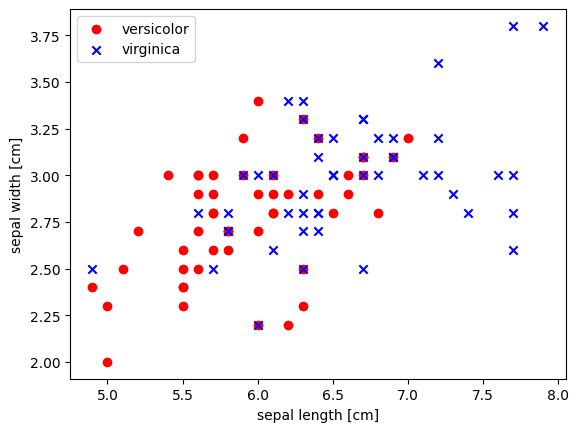

In [21]:
# select setosa and versicolor
y = df.iloc[50:, 4].values
y = np.where( y == 'Iris-virginica', -1, 1)

# extract sepal length and width
X = df.iloc[50:, [0,1]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:, 0], X[50:, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.show()

#### Training the Perceptron model

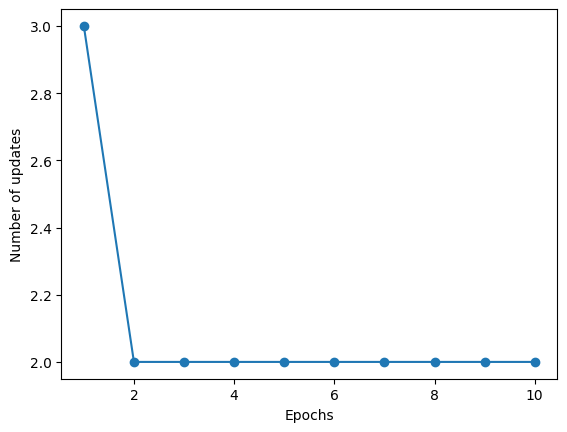

In [22]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

#### Training the Adaline model


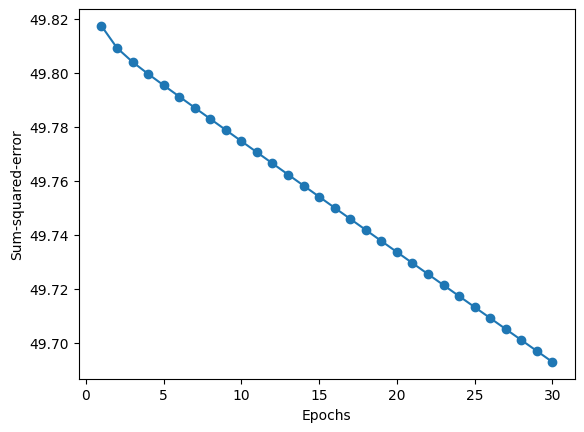

In [23]:
ada = AdalineGD(n_iter=30, eta=0.0001)
ada.fit(X, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

#### Perceptron model result

<ipython-input-8-f7514e5a6ee6>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


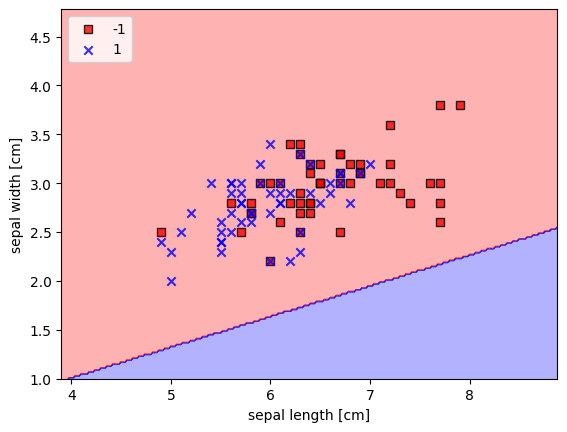

Perceptron accuracy: 0.5


In [24]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.show()

y_pred_ppn = ppn.predict(X)
accuracy = accuracy_score(y, y_pred_ppn)
print(f'Perceptron accuracy: {accuracy}')


#### Adaline Result

<ipython-input-8-f7514e5a6ee6>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


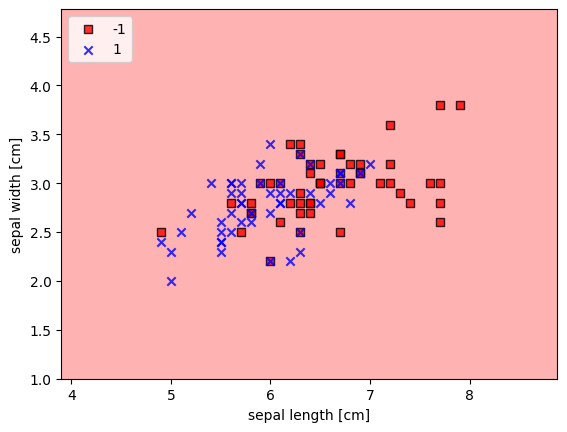

Adaline accuracy: 0.5


In [25]:
plot_decision_regions(X, y, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

plt.show()

y_pred_ada = ada.predict(X)
accuracy = accuracy_score(y, y_pred_ada)
print(f'Adaline accuracy: {accuracy}')

### NOT Linear separable using three features to classify two classes
two classes : `versicolor` and `virginica`

two features : `sepal length`, `sepal width` and `petal length`

#### Preprocessing and plotting the Iris data

In [26]:
# select setosa and versicolor
y = df.iloc[50:, 4].values
y = np.where( y == 'Iris-virginica', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[50:, 0:3].values

#### Training the Perceptron model

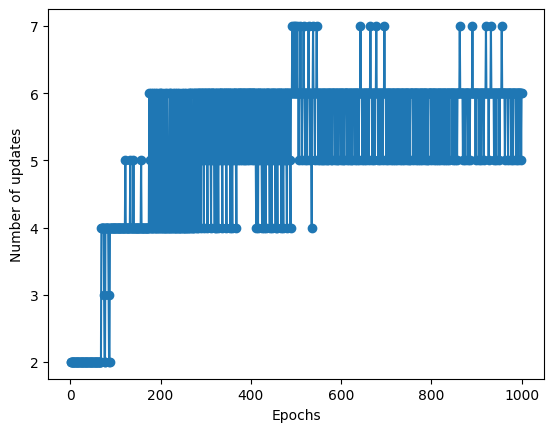

In [27]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

#### Training the Adaline model


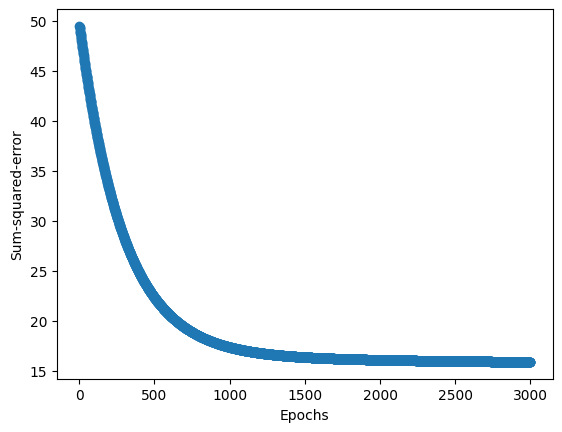

In [28]:
ada = AdalineGD(n_iter=3000, eta=0.0001)
ada.fit(X, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

#### Perceptron model result

In [29]:
y_pred_ppn = ppn.predict(X)
accuracy = accuracy_score(y, y_pred_ppn)
print(f'Perceptron accuracy: {accuracy}')


Perceptron accuracy: 0.89


#### Adaline Result

In [30]:
y_pred_ada = ada.predict(X)
accuracy = accuracy_score(y, y_pred_ada)
print(f'Adaline accuracy: {accuracy}')

Adaline accuracy: 0.92


### NOT Linear separable using four features to classify two classes
two classes : `versicolor` and `virginica`

two features : `sepal length`, `sepal width`, `petal length` and `petal width`

#### Preprocessing and plotting the Iris data

In [31]:
# select setosa and versicolor
y = df.iloc[50:, 4].values
y = np.where( y == 'Iris-virginica', -1, 1)

# extract sepal length, sepal width, petal length and petal width
X = df.iloc[50:, 0:4].values

#### Training the Perceptron model

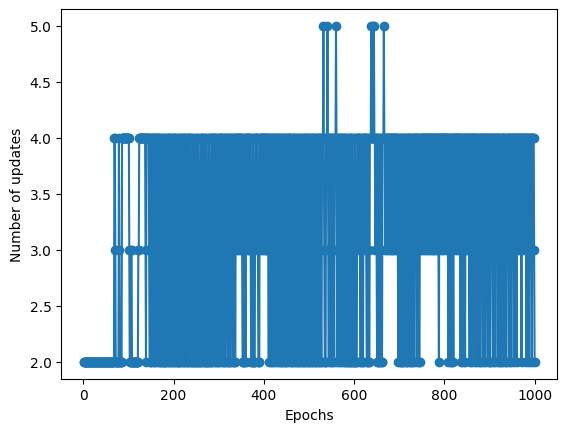

In [32]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

#### Training the Adaline model


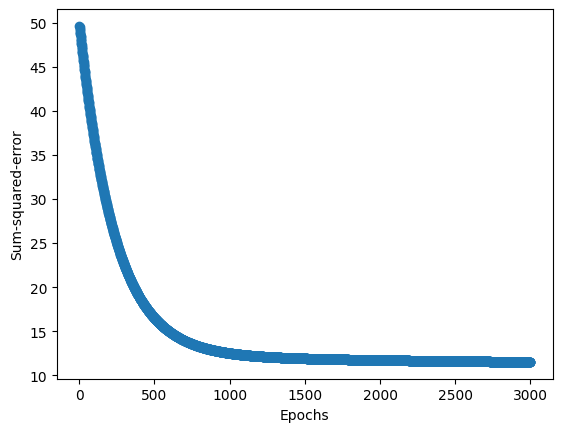

In [33]:
ada = AdalineGD(n_iter=3000, eta=0.0001)
ada.fit(X, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()

#### Perceptron model result

In [34]:
y_pred_ppn = ppn.predict(X)
accuracy = accuracy_score(y, y_pred_ppn)
print(f'Perceptron accuracy: {accuracy}')

Perceptron accuracy: 0.96


#### Adaline Result

In [35]:
y_pred_ada = ada.predict(X)
accuracy = accuracy_score(y, y_pred_ada)
print(f'Adaline accuracy: {accuracy}')

Adaline accuracy: 0.97


## Summary
1. Linearly separable data can be classified effectively by both the Perceptron and Adaline models using a small number of epochs.

2. Both the Perceptron and Adaline models struggle to classify nonlinearly separable data in two dimensions. However, as the dimensionality (number of features) increases, the data may be nearly separable, so the models can achieve better performance after a large number of epochs.

3. Careful selection of the learning rate is crucial for both models, especially for the Adaline model. An inappropriate learning rate may prevent the gradient from converging properly.

4. In the experiment, the Perceptron model achieved good performance with fewer epochs compared to the Adaline model.